In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [2]:
# Load and inspect the dataset
raw_data = pd.read_csv('diabetes.csv')
print(raw_data.head())
print(raw_data.info())
print(raw_data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [3]:
# Quantidade de valores infinitos por coluna
print(raw_data.isin([float('inf'), -float('inf')]).sum())

# Quantidade de valores NaN por coluna
print(raw_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


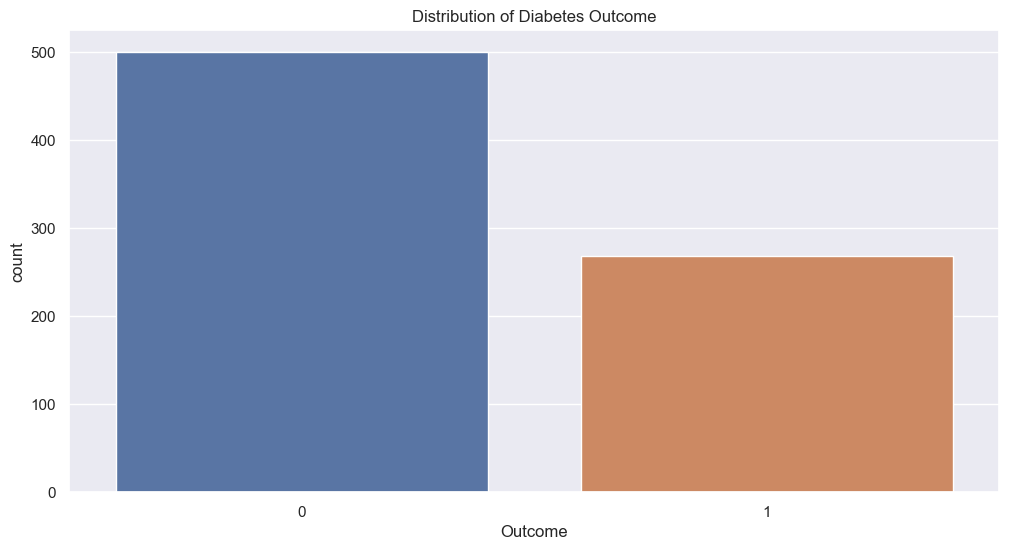

In [4]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=raw_data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

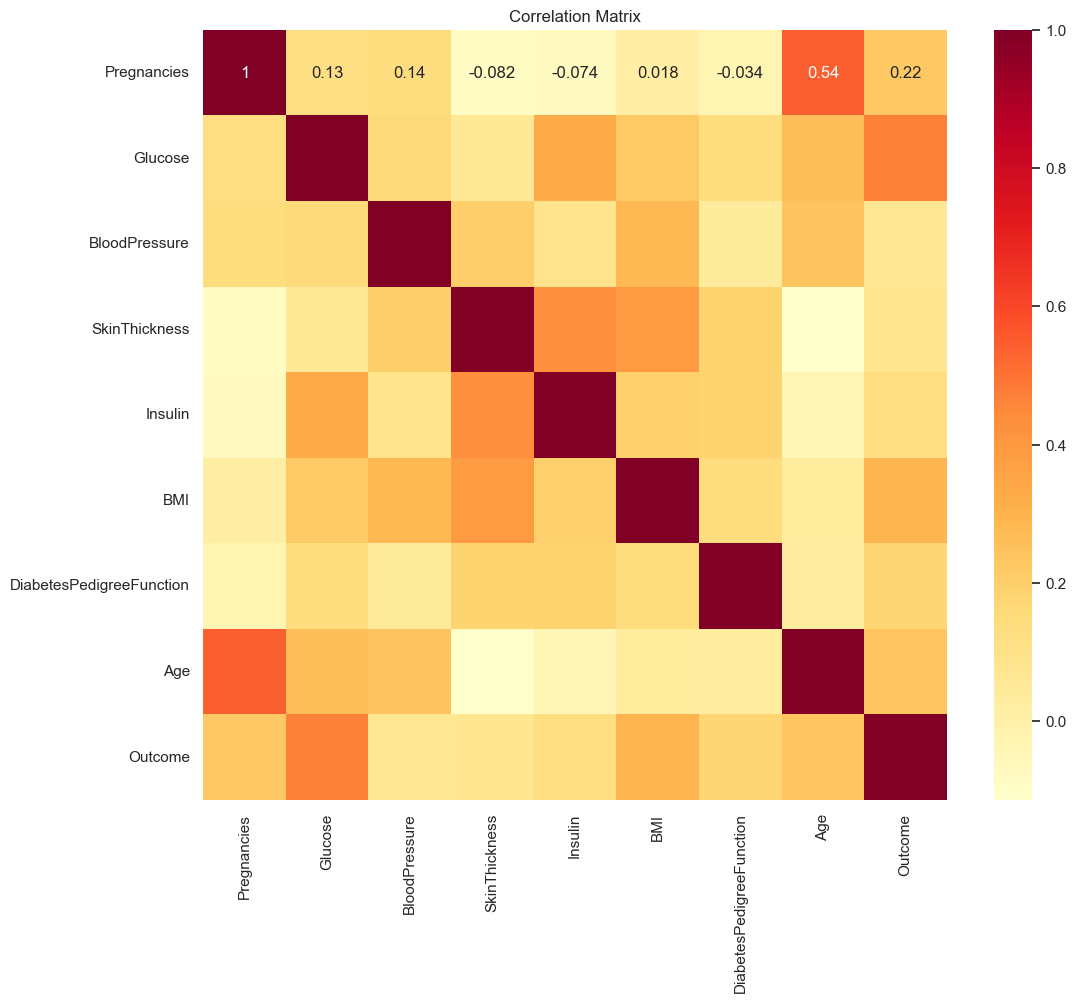

In [5]:
corr = raw_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

## Tratando os outliers

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


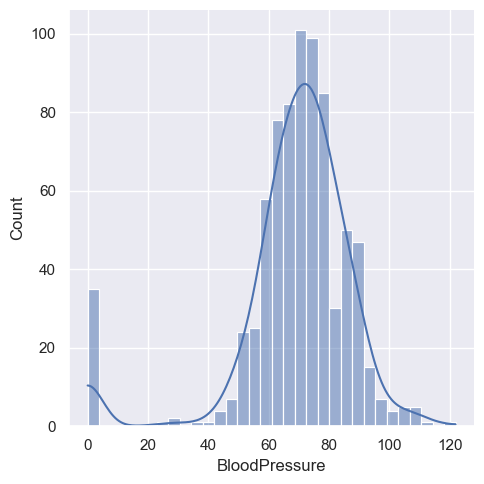

In [6]:
sns.displot(raw_data['BloodPressure'], kde=True)

In [7]:
# Tirar os outliers extremos
p1 = raw_data['BloodPressure'].quantile(0.045)
p99 = raw_data['BloodPressure'].quantile(0.99)

# Criar um novo DataFrame com os valores dentro do intervalo
data_1 = raw_data[(raw_data['BloodPressure'] >= p1) & (raw_data['BloodPressure'] <= p99)]
data_1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[726 rows x 9 columns]

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


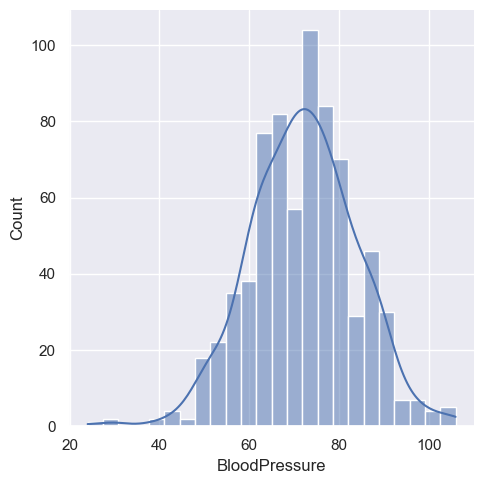

In [8]:
sns.displot(data_1['BloodPressure'], kde=True)

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


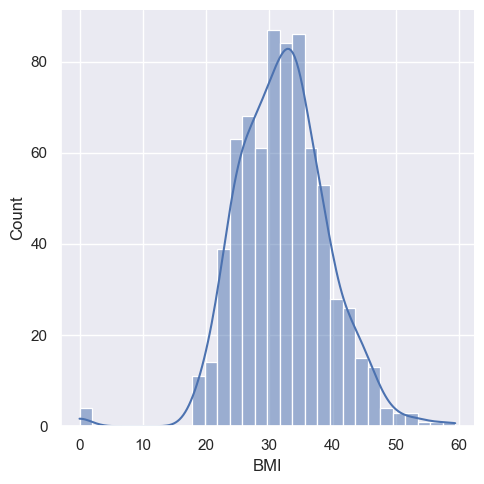

In [9]:
sns.displot(data_1['BMI'], kde=True)

In [10]:
p1 = data_1['BMI'].quantile(0.01)
p99 = data_1['BMI'].quantile(0.99)

# Criar um novo DataFrame com os valores dentro do intervalo
bmipercent = data_1[(data_1['BMI'] >= p1) & (data_1['BMI'] <= p99)]

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


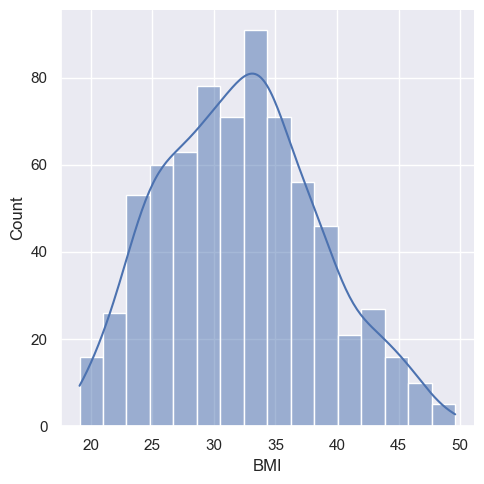

In [11]:
sns.displot(bmipercent['BMI'], kde=True)

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


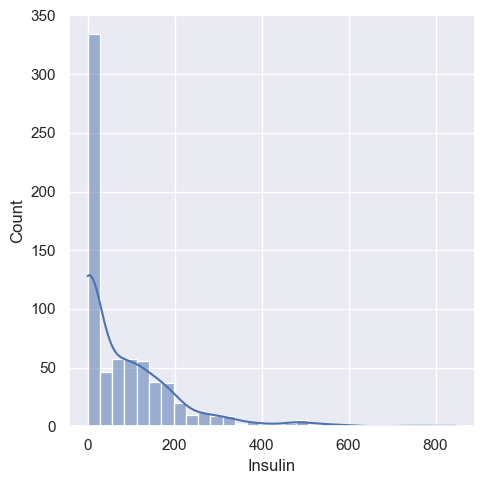

In [12]:
sns.displot(bmipercent['Insulin'],kde=True)

In [13]:
p1 = bmipercent['Insulin'].quantile(0.02)
p99 = bmipercent['Insulin'].quantile(0.99)

# Criar um novo DataFrame com os valores dentro do intervalo
insulin_pct = bmipercent[(bmipercent['Insulin'] >= p1) & (bmipercent['Insulin'] <= p99)]

C:\Users\VINICIUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


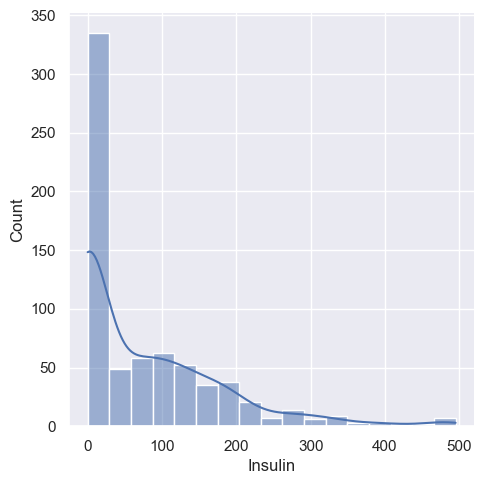

In [14]:
sns.displot(insulin_pct['Insulin'],kde=True)

In [15]:
# Quantidade de valores infinitos por coluna
print(insulin_pct.isin([float('inf'), -float('inf')]).sum())

# Quantidade de valores NaN por coluna
print(insulin_pct.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Realizando a regressão

In [16]:
# Preparar a data para o modelo
x1 = insulin_pct.drop('Outcome', axis=1)
y = insulin_pct['Outcome']
X1 = insulin_pct.drop('Outcome', axis=1)

In [17]:
# Separando os dados para treino e teste
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=365)

In [18]:
# Transformando as variáveis
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# realizando a regressão de treino
x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x)
results_log = reg_log.fit()
# Retornando a tabela de resultado da regressão
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.462606
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  561
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.2774
Time:                        12:45:39   Log-Likelihood:                -259.52
converged:                       True   LL-Null:                       -359.13
Covariance Type:            nonrobust   LLR p-value:                 9.366e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.9395      0.983     -9.098      0.000     -10.865      -7.014
Pregnancies                  0.1141      0.038      2.986      0.003       0.039       0.189
Glucose                      0.0373      0.004      8.361      0.000       0.029       0.046
BloodPressure               -0.0063      0.011     -0.583      0.560      -0.028       0.015
SkinThickness                0.0040      0.008      0.483      0.629      -0.012       0.020
Insulin                     -0.0025      0.001     -1.887      0.059      -0.005    9.52e-05
BMI                          0.0754      0.021      3.638      0.000       0.035       0.116
DiabetesPedigreeFunction     1.2398      0.354      3.507      0.000       0.547       1.933
Age                          0.0191      0.012      1.632      0.103      -0.004       0.042
============================================================================================
"""

In [20]:
# O mesmo aqui para os dados de teste
X = sm.add_constant(x_test)
reg_log1 = sm.Logit(y_test,X)
results_log1 = reg_log1.fit()
results_log1.summary()

Optimization terminated successfully.
         Current function value: 0.446478
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  141
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            8
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.2870
Time:                        12:45:39   Log-Likelihood:                -62.953
converged:                       True   LL-Null:                       -88.298
Covariance Type:            nonrobust   LLR p-value:                 3.012e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.5426      2.140     -4.928      0.000     -14.736      -6.349
Pregnancies                  0.1377      0.087      1.587      0.113      -0.032       0.308
Glucose                      0.0268      0.009      3.065      0.002       0.010       0.044
BloodPressure                0.0080      0.020      0.395      0.693      -0.032       0.048
SkinThickness               -0.0086      0.018     -0.483      0.629      -0.044       0.026
Insulin                      0.0028      0.002      1.193      0.233      -0.002       0.007
BMI                          0.1445      0.044      3.274      0.001       0.058       0.231
DiabetesPedigreeFunction     1.6370      0.805      2.033      0.042       0.059       3.215
Age                         -0.0083      0.024     -0.340      0.734      -0.056       0.040
============================================================================================
"""

## Calculando a matriz de confusão

In [21]:
def confusion_matrix(data, actual_values, model):
    
    # Função para calcular a matriz de confusão e a acurácia de um modelo de regressão logística.

    #Parâmetros:
    #----------
    #data: dataframe ou array
        #Dados no mesmo formato dos dados de entrada (sem os valores reais).
        #Por exemplo: const, var1, var2, etc. A ordem é muito importante!
    #actual_values: dataframe ou array
        #Estes são os valores reais dos dados de teste.
        #No caso de uma regressão logística, deve ser uma única coluna com 0s e 1s.
    #model: objeto LogitResults
       # Esta é a variável onde você tem o modelo ajustado.
        #Por exemplo: results_log neste curso.
    #----------

    #Retorna:
    #-------
    #cm: matriz de confusão
    #accuracy: acurácia do modelo

    # Prevê os valores usando o modelo Logit
    pred_values = model.predict(data)
    # Especifica os bins
    bins = np.array([0, 0.5, 1])
    # Cria um histograma, onde se os valores estiverem entre 0 e 0.5, serão considerados 0
    # se estiverem entre 0.5 e 1, serão considerados 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # Calcula a acurácia
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
    # Retorna a matriz de confusão e a acurácia
    return cm, accuracy

In [22]:
confusion_matrix(x,y_train,results_log)

(array([[331.,  40.],
        [ 84., 106.]]),
 0.7789661319073083)

In [23]:
confusion_matrix(X,y_test,results_log1)

(array([[85., 11.],
        [21., 24.]]),
 0.7730496453900709)

In [24]:
y_pred_prob = results_log1.predict(X)
y_pred = (y_pred_prob > 0.5).astype(int)

In [25]:
y_train = np.array(y_train)

In [26]:
a, b = np.polyfit(range(len(y_test)), y_pred, 1)

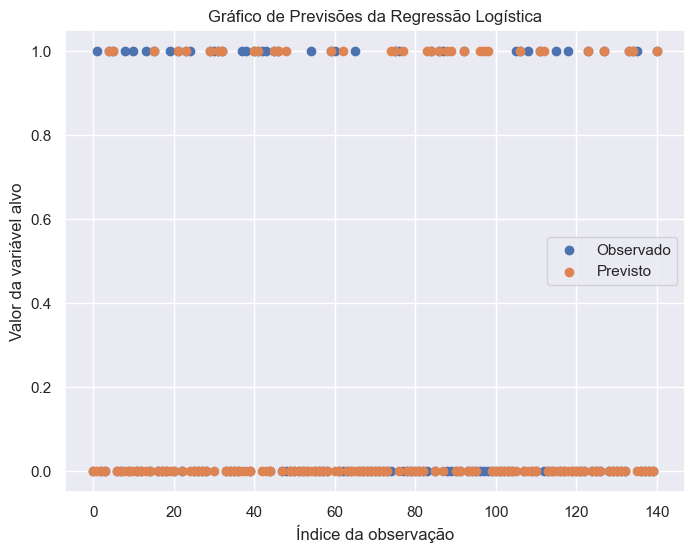

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Observado')
plt.scatter(range(len(y_pred)), y_pred, label='Previsto')
plt.xlabel('Índice da observação')
plt.ylabel('Valor da variável alvo')
plt.title('Gráfico de Previsões da Regressão Logística')
plt.legend()
plt.show()